In [12]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

# Load data into a pandas DataFrame
data = pd.read_csv("liver regeneration.csv")
data


,PVV/GW (cm/s/100 g),PSV/GW (cm/s/100 g),EDV/GW (cm/s/100 g),HVV/GW (cm/s/100 g),GW/SLV (%),GRWR (%),Regeneration rate (%)
0,16.36,8.90,3.47,6.02,57.42,1.11,158.76
1,26.68,21.22,3.53,12.07,61.38,1.36,197.19
2,12.49,16.62,2.00,8.88,67.42,1.47,144.73
3,8.45,22.86,6.71,7.46,69.94,1.31,140.06
4,10.19,14.23,4.75,2.06,65.68,1.25,129.71
5,19.53,17.35,1.95,7.54,59.63,1.14,162.59
6,20.65,10.48,2.21,4.88,59.42,1.07,178.48
7,22.96,14.23,4.25,3.69,75.08,1.73,120.90
8,21.22,21.64,4.10,11.94,43.42,0.87,191.24
9,8.11,3.16,0.78,8.82,75.12,1.47,150.03


<Axes: >

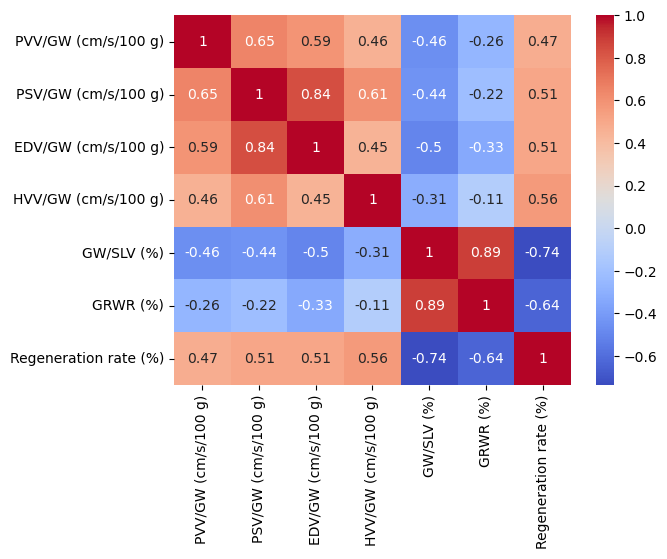

In [4]:
# Select independent variables
X = data[['PVV/GW (cm/s/100 g)', 'PSV/GW (cm/s/100 g)',	'EDV/GW (cm/s/100 g)',	'HVV/GW (cm/s/100 g)',	'GW/SLV (%)',	'GRWR (%)']]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [5]:
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF results
print(vif)


   VIF Factor             features
0    8.225499  PVV/GW (cm/s/100 g)
1   17.141722  PSV/GW (cm/s/100 g)
2    8.700194  EDV/GW (cm/s/100 g)
3    8.941242  HVV/GW (cm/s/100 g)
4  100.368474           GW/SLV (%)
5  106.412115             GRWR (%)


In [11]:

#*********Second Level task
# Remove highly correlated independent variables
data = data.drop(['PSV/GW (cm/s/100 g)','GW/SLV (%)','GRWR (%)'], axis=1)
# Again Select independent variables
X = data[['PVV/GW (cm/s/100 g)', 'EDV/GW (cm/s/100 g)','HVV/GW (cm/s/100 g)']]

# Again Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
# Print the VIF results
print(vif)


   VIF Factor             features
0    6.649398  PVV/GW (cm/s/100 g)
1    3.750104  EDV/GW (cm/s/100 g)
2    5.385041  HVV/GW (cm/s/100 g)


In [13]:

#********Third Level task
# Use PCA to combine highly correlated independent variables
pca = PCA(n_components=1)
data['pca'] = pca.fit_transform(data[['PSV/GW (cm/s/100 g)','GW/SLV (%)','GRWR (%)']])
data
# Again Select independent variables
X = data[['PVV/GW (cm/s/100 g)', 'EDV/GW (cm/s/100 g)',	'HVV/GW (cm/s/100 g)','pca']]

# Again Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
# Print the VIF results
print(vif)


   VIF Factor             features
0    6.654105  PVV/GW (cm/s/100 g)
1    4.697261  EDV/GW (cm/s/100 g)
2    5.656494  HVV/GW (cm/s/100 g)
3    1.352417                  pca


In [8]:



#Ridge Regression
X = data.drop('Regeneration rate (%)', axis=1)
y = data['Regeneration rate (%)']
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
coefficients = ridge.coef_
print("Ridge Regression coefficients:", coefficients)


Ridge Regression coefficients: [0.69614326 2.93393301 3.9613189 ]
